In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [23]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [24]:
import pandas as pd
df=pd.read_csv("/kaggle/input/college-student-placement-factors-dataset/college_student_placement_dataset.csv")

# Drop rows with any null values
df_cleaned = df.dropna()

df['Prev_Sem_Result'] = df['Prev_Sem_Result'].fillna(df['Prev_Sem_Result'].mean())
df['CGPA'] = df['CGPA'].fillna(df['CGPA'].median())



In [25]:
df.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  object 
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB


## 1. Scatter Plot — IQ vs CGPA Colored by Placement ##

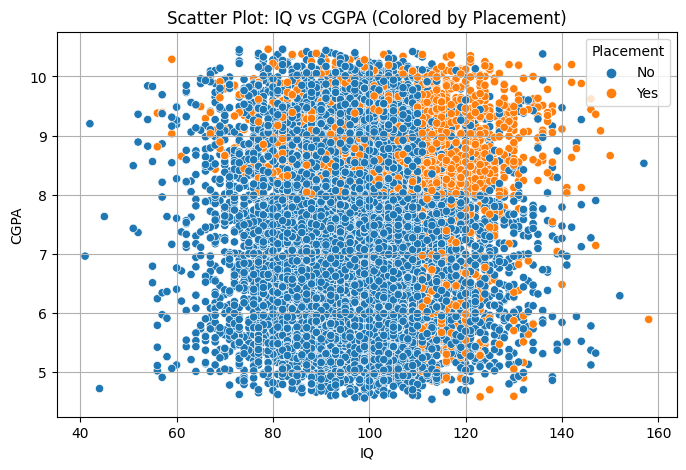

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.scatterplot(x='IQ', y='CGPA', hue='Placement', data=df)
plt.title("Scatter Plot: IQ vs CGPA (Colored by Placement)")
plt.xlabel("IQ")
plt.ylabel("CGPA")
plt.grid(True)
plt.show()


## 2. Line Plot — Projects Completed vs Extra Curricular Score ##

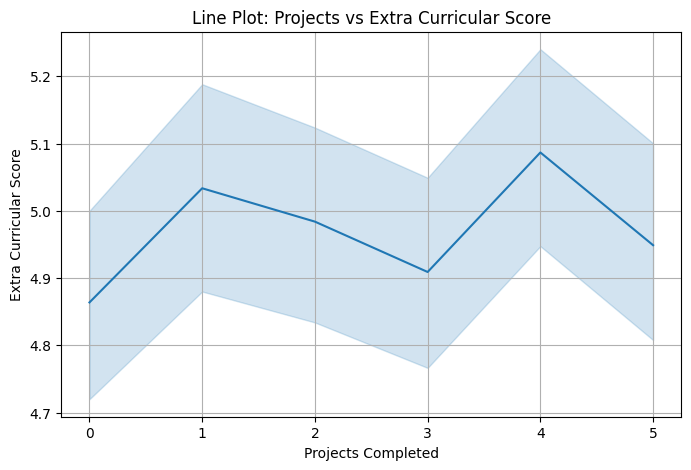

In [28]:
plt.figure(figsize=(8, 5))
sns.lineplot(x='Projects_Completed', y='Extra_Curricular_Score', data=df)
plt.title("Line Plot: Projects vs Extra Curricular Score")
plt.xlabel("Projects Completed")
plt.ylabel("Extra Curricular Score")
plt.grid(True)
plt.show()


## Box Plot — CGPA Distribution by Placement Status ##

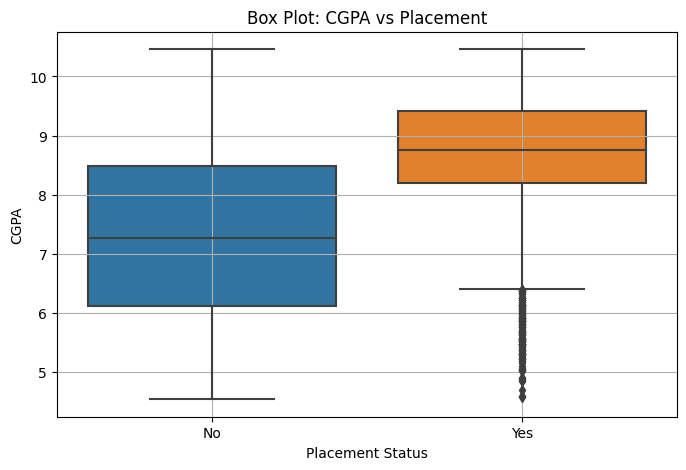

In [13]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Placement', y='CGPA', data=df)
plt.title("Box Plot: CGPA vs Placement")
plt.xlabel("Placement Status")
plt.ylabel("CGPA")
plt.grid(True)
plt.show()


## Histogram — Distribution of Communication Skills ##

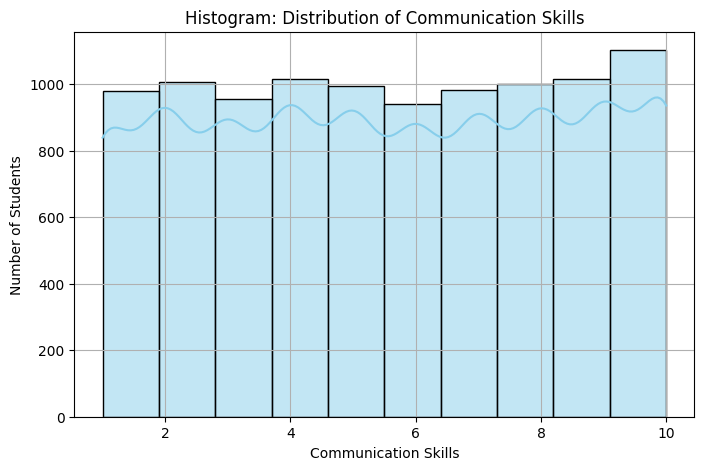

In [29]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Communication_Skills'], bins=10, kde=True, color='skyblue')
plt.title("Histogram: Distribution of Communication Skills")
plt.xlabel("Communication Skills")
plt.ylabel("Number of Students")
plt.grid(True)
plt.show()


## Count Plot — Total Placement Count ##

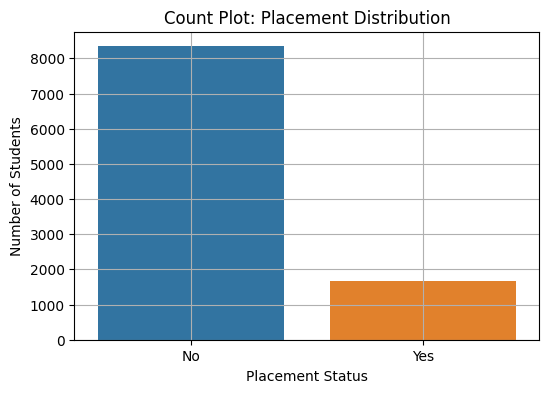

In [15]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Placement', data=df)
plt.title("Count Plot: Placement Distribution")
plt.xlabel("Placement Status")
plt.ylabel("Number of Students")
plt.grid(True)
plt.show()
